## MLPs

In [52]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [53]:
# Simple perceptron from sklearn
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # For setosa class

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
y_pred


array([ True, False])

In [54]:
# MLP Regressors

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()    #JSON/dictionary format
X_train_full, X_test, y_trian_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_trian_full, random_state=42
)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)
print(f"{rmse = }")

rmse = 0.5053326657968523


## Tensorflow/Keras

In [55]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [56]:
# convert to 0 - 1 pixel value
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

# names for readability
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(f"{class_names[y_train[0]] = }")

class_names[y_train[0]] = 'Ankle boot'


In [144]:
tf.keras.backend.clear_session()

# Create model
# tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(200, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


In [145]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321,360 (1.23 MB)

 Trainable params: 321,360 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [146]:
# model layer names
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>]

In [147]:
# weights and biases of specific layer
weights, biases = model.layers[1].get_weights()
weights # shape is (784, 300), 28x28 input to 300 neurons

array([[-0.00492816, -0.05061147, -0.01826617, ...,  0.0292165 ,
        -0.00968001,  0.06379126],
       [-0.03609843,  0.05729041, -0.07190788, ...,  0.00372197,
        -0.02996411,  0.05988765],
       [-0.01848435, -0.05864402,  0.04121871, ...,  0.00832573,
         0.00287185, -0.01678044],
       ...,
       [ 0.00222185, -0.06009477,  0.05914716, ..., -0.04570618,
        -0.00550629,  0.04234361],
       [ 0.06519489,  0.00319583, -0.03161389, ..., -0.05745541,
         0.00366116,  0.06212224],
       [ 0.06661154, -0.05691605,  0.02277651, ..., -0.07386649,
        -0.00412373, -0.00842913]], dtype=float32)

In [148]:
# compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Note that sparse_categorical_cross_entropy is used here since our target is
# between 0 and 9, representing categories. If the target is a vector representing
# a specific category ([0, 0, 1, 0,] to indicate category 3), then we would
# use categorical_crossentropy

In [149]:
# train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6277 - loss: 1.1164 - val_accuracy: 0.8300 - val_loss: 0.4872
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8258 - loss: 0.4970 - val_accuracy: 0.8424 - val_loss: 0.4390
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8458 - loss: 0.4372 - val_accuracy: 0.8488 - val_loss: 0.4197
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8585 - loss: 0.4007 - val_accuracy: 0.8508 - val_loss: 0.4123
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8661 - loss: 0.3748 - val_accuracy: 0.8532 - val_loss: 0.4032
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8720 - loss: 0.3547 - val_accuracy: 0.8540 - val_loss: 0.3992
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8779 - loss: 0.3383 - val_accuracy: 0.8552 - val_loss: 0.3933
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8819 - loss: 0.3240 - 

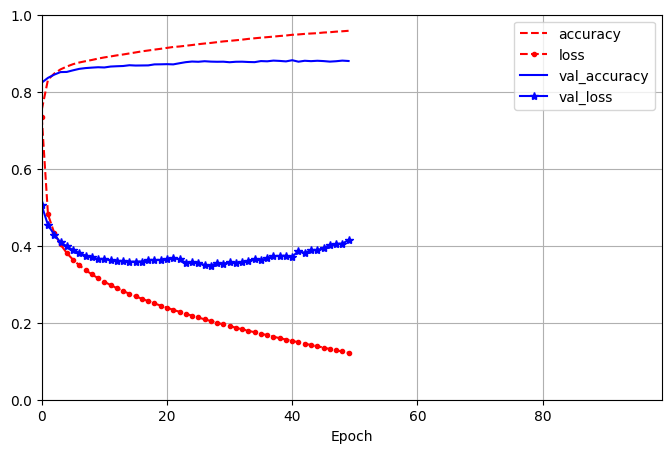

In [138]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 99], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [150]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8772 - loss: 0.4187


[0.40934526920318604, 0.8766999840736389]

In [151]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### California Housing Example

In [172]:
tf.keras.backend.clear_session()


In [173]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, random_state=42
)


In [174]:
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20


/Users/homemasaki/.pyenv/versions/3.10.6/envs/dream/lib/python3.10/site-packages/keras/src/layers/preprocessing/normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.2291 - loss: 1.6299 - val_RootMeanSquaredError: 0.6190 - val_loss: 0.3832
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6342 - loss: 0.4028 - val_RootMeanSquaredError: 0.6108 - val_loss: 0.3731
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6069 - loss: 0.3687 - val_RootMeanSquaredError: 0.5811 - val_loss: 0.3376
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5932 - loss: 0.3522 - val_RootMeanSquaredError: 0.5767 - val_loss: 0.3325
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5829 - loss: 0.3400 - val_RootMeanSquaredError: 0.6194 - val_loss: 0.3836
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5749 - loss: 0.3307 - val_RootMeanSquaredError: 0.6178 - val_loss: 0.3816
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5675 - loss: 0.3222 -

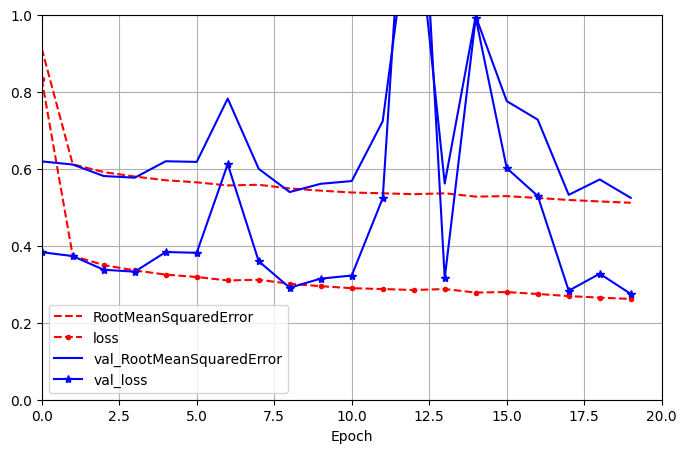

In [175]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 20], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [181]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

print(f"{mse_test = }")
print(f"{rmse_test = }")
print(f"{y_pred = }")
print(f"{y_test[:3] = }")

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - RootMeanSquaredError: 0.5288 - loss: 0.2797
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
mse_test = 0.28212404251098633
rmse_test = 0.5311535000801086
y_pred = array([[0.47658893],
       [0.9671573 ],
       [5.2061443 ]], dtype=float32)
y_test[:3] = array([0.477  , 0.458  , 5.00001])


### Nonsequential NN

In [183]:
tf.keras.backend.clear_session()

normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])